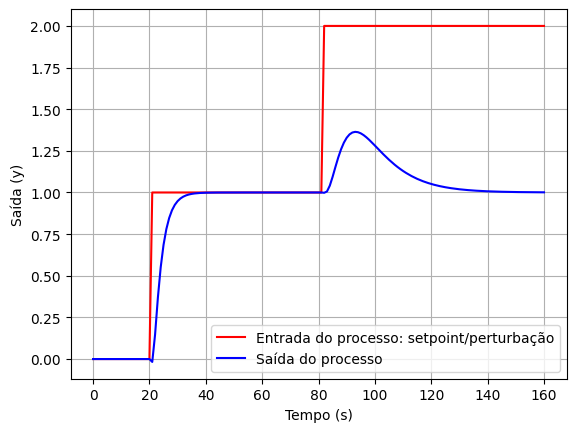

In [1]:
# ----------------------------------------------------------------------------
#                             D E S C R I Ç Ã O
# ----------------------------------------------------------------------------
# Descrição do código: Controle de de um sistema genérico
# Implementado por: Davi Leonardo de Souza
# Versão: 2.0
# Data: 27/03/2024
# ----------------------------------------------------------------------------
#                           B I B L I O T E C A S
# ----------------------------------------------------------------------------

import os                              # acessa funções do sistema operacional
import control as ct                   # controle
import matplotlib.pyplot as plt        # gráficos
import numpy as np                     # vetores e matrizes

# ----------------------------------------------------------------------------
#                   P R É  -  P R O C E S S A M E N T O
# ----------------------------------------------------------------------------

# Realizando a limpeza do terminal do sistema operacional
os.system('cls' if os.name == 'nt' else 'clear')

# ----------------------------------------------------------------------------
#                              F U N Ç Õ E S
# ----------------------------------------------------------------------------


# ----------------------------------------------------------------------------
#                    P R O G R A M A   P R I N C I P A L
# ----------------------------------------------------------------------------
# Variáveis de entrada:

# Definindo a Função de Transferência:

s = ct.tf('s')                              # Define variável de Laplace

# Tempo de simulação:

t = np.arange(0, 161, 1)

# Função de Transferência da Planta:

# Aproximação de Padé:

teta = 1        # Tempo morto
pade = (1 - teta/2*s) / (1 + teta/2*s)
Gp = 2*pade/((10*s+1)*(5*s+1))              # FT da Planta

# Função de Transferência do controlador:

Kc = 1.88
tauI = 15
tauD = 3.33
Gc = Kc * (1 + 1/(tauI*s) + tauD*s)         # FT do Controlador

# Resolução do problema:

M = 1               # Amplitude do degrau

# Sistema Servo:
# sinal de entrada antes da mudança no setpoint
u1 = np.zeros_like(t[:21])
u2 = M * np.ones_like(t[21:81])         # entrada do setpoint
# sinal de entrada total para Sistema Servo
u_servo = np.concatenate((u1, u2))

# Simulação da Função de Transferência da malha fechada para o sistema Servo

FTservo = (Gc*Gp)/(1+Gc*Gp)              # FT do sistema Servo

tout, yservo = ct.forced_response(FTservo, T=t[:81], U=u_servo)    # saída do sistema Servo

# Sistema Regulador:
u3 = np.zeros_like(t[81:82])           # sinal de entrada antes da perturbação
u4 = M * np.ones_like(t[82:161])       # entrada da perturbação
u_reg = np.concatenate((u3, u4))       # sinal de entrada total

# Simulação da Função de Transferência da malha fechada para o sistema Servo

FTreg = (Gp)/(1+Gc*Gp)                   # FT do sistema Servo

tout, yreg = ct.forced_response(FTreg, T=t[81:], U=u_reg)         # saída do medidor
yreg = M + yreg
u_reg = M + u_reg

# Retirando variável desvio
y = np.concatenate((yservo, yreg))
u = np.concatenate((u_servo, u_reg))

# ----------------------------------------------------------------------------
#                             G R Á F I C O S
# ----------------------------------------------------------------------------

plt.plot(t, u, 'r', label='Entrada do processo: setpoint/perturbação')
plt.plot(t, y, 'b', label='Saída do processo')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída (y)')
plt.grid(True)
plt.legend()
plt.show()